In [59]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns


#Study1
-----------------------------------------------------------------
Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥Ïò§Í≥†, ÌòïÌÉúÎ•º ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.<br>
(ÏïÑÏù¥Ìé† Ïª®ÌÖåÏù¥ÎÑà ÌòïÏÑ± Ïò§Î•òÎ°ú Ïù∏Ìï¥ Google colabÏóêÏÑú ÏΩîÎî©ÏùÑ ÏßÑÌñâÌñàÏäµÎãàÎã§.<br> Í∞ÄÏÉÅÌôòÍ≤ΩÏóê dataÎ•º Í∞ÄÏ†∏ÏôÄ ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÏó¨ ÎîîÎ†âÌÜ†Î¶¨ pathÏóê Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.)

In [37]:
data_dir = join('../content/sample_data')
# hint : os.getenvÎ•º ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò ÏßÅÏ†ë Í≤ΩÎ°úÎ•º ÏûëÏÑ±

train_data_path = join(data_dir, 'train.csv')
sub_data_path = join(data_dir, 'test.csv')      # ÌÖåÏä§Ìä∏, Ï¶â submission Ïãú ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú

print(train_data_path)
print(sub_data_path)

../content/sample_data/train.csv
../content/sample_data/test.csv


In [38]:
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)
print(f'train data dim : {data.shape}')
print(f'sub data dim : {sub.shape}')

train data dim : (15035, 21)
sub data dim : (6555, 20)


In [39]:
y = data['price']
del data['price']

print(data.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [40]:
train_len = len(data)
data = pd.concat((data, sub), axis=0)

print(len(data))

21590


In [41]:
data.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  20141013T000000         3       1.00         1180      5650     1.0   
1   1  20150225T000000         2       1.00          770     10000     1.0   
2   2  20150218T000000         3       2.00         1680      8080     1.0   
3   3  20140627T000000         3       2.25         1715      6819     2.0   
4   4  20150115T000000         3       1.50         1060      9711     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      6         770              0      1933   
2           0     0          3      8        1680              0      1987   
3           0     0          3      7        1715              0      1995   
4           0     0          3      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ 
### 1. Í≤∞Ï∏°Ïπò ÌôïÏù∏
Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäîÏßÄÎ•º ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.<br>
missingno ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò matrix Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥, Îç∞Ïù¥ÌÑ∞Ïùò Í≤∞Ï∏° ÏÉÅÌÉúÎ•º ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÏÇ¥Ìé¥Î≥º Ïàò ÏûàÏäµÎãàÎã§.

<Axes: >

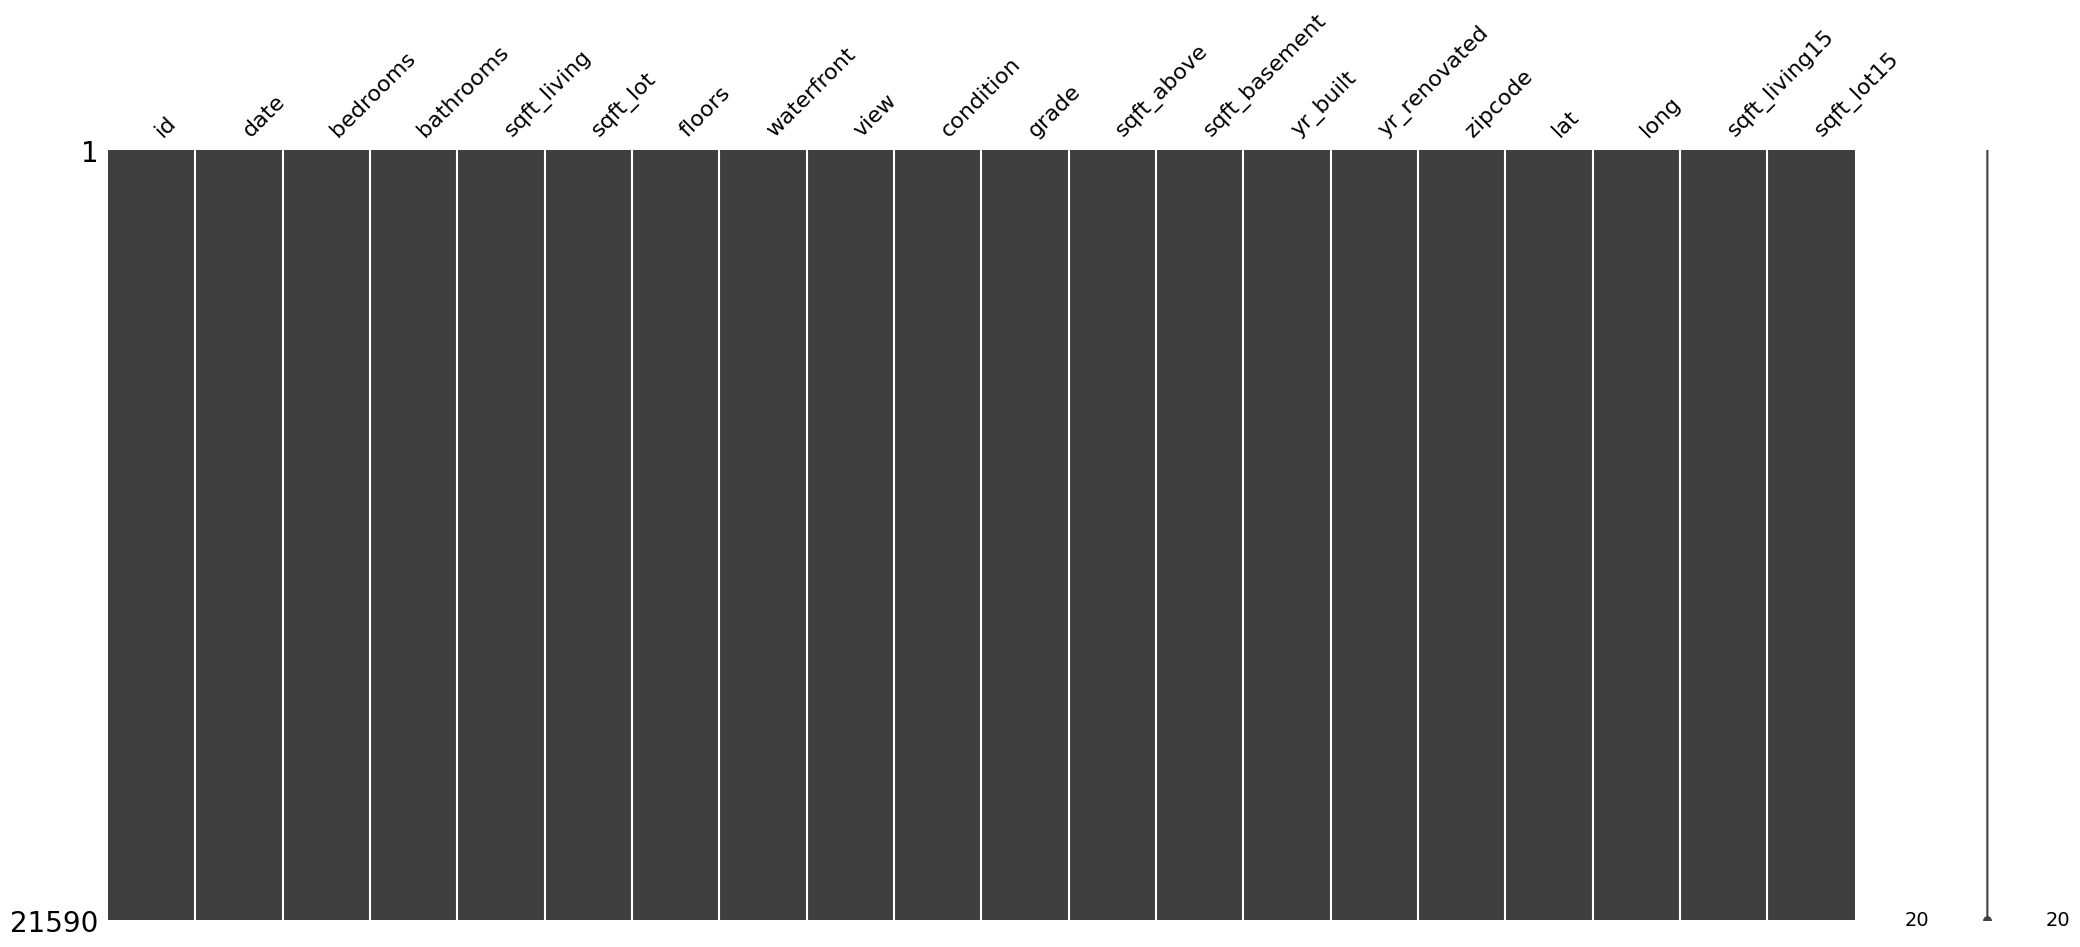

In [42]:
msno.matrix(data)

In [43]:
for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


### 2. id, date Î≥ÄÏàò Ï†ïÎ¶¨
id Î≥ÄÏàòÎäî Î™®Îç∏Ïù¥ ÏßëÍ∞íÏùÑ ÏòàÏ∏°ÌïòÎäîÎç∞ ÎèÑÏõÄÏùÑ Ï£ºÏßÄ ÏïäÏúºÎØÄÎ°ú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï†úÍ±∞Ìï©ÎãàÎã§.<br>
Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú submission Îç∞Ïù¥ÌÑ∞Ïóê ÏÇ¨Ïö©ÌïòÍ∏∞ÏúÑÌï¥ id Î≥ÄÏàòÎ•º sub_idÏóê Ï†ÄÏû•ÌïòÏòÄÏäµÎãàÎã§.<br><br>
date Î≥ÄÏàòÎäî Ïó∞ÏõîÏùºÏãúÍ∞ÑÏúºÎ°ú Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎäîÎç∞, Ïó∞ÏõîÎßå Í≥†Î†§ÌïòÎäî Î≤îÏ£ºÌòï Î≥ÄÏàòÎ°ú ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [44]:
sub_id = data['id'][train_len:]
del data['id']

print(data.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [45]:
data['date'] = data['date'].apply(lambda x : str(x[:6]))

data.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  201410         3       1.00         1180      5650     1.0           0   
1  201502         2       1.00          770     10000     1.0           0   
2  201502         3       2.00         1680      8080     1.0           0   
3  201406         3       2.25         1715      6819     2.0           0   
4  201501         3       1.50         1060      9711     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      6         770              0      1933             0   
2     0          3      8        1680              0      1987             0   
3     0          3      7        1715              0      1995             0   
4     0          3      7        1060              0      1963             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98028  47.7379 -122.233           2720        8062  
2    98074  47.6168 -122.045           1800        7503  
3    98003  47.3097 -122.327           2238        6819  
4    98198  47.4095 -122.315           1650        9711

### 3. Í∞Å Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨ ÌôïÏù∏
ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Î∂ÑÌè¨Îäî Î™®Îç∏Ïù¥ Í≤∞Í≥ºÎ•º ÏòàÏ∏°ÌïòÍ∏∞Ïóê Ï¢ãÏßÄ ÏïäÏùÄ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎØÄÎ°ú Î°úÍ∑∏ Ïä§ÏºÄÏùºÎ°ú Î∞îÍøîÏÑú Îç∞Ïù¥ÌÑ∞Î•º Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπùÍ≤å ÏàòÏ†ïÌïòÏòÄÏäµÎãàÎã§.

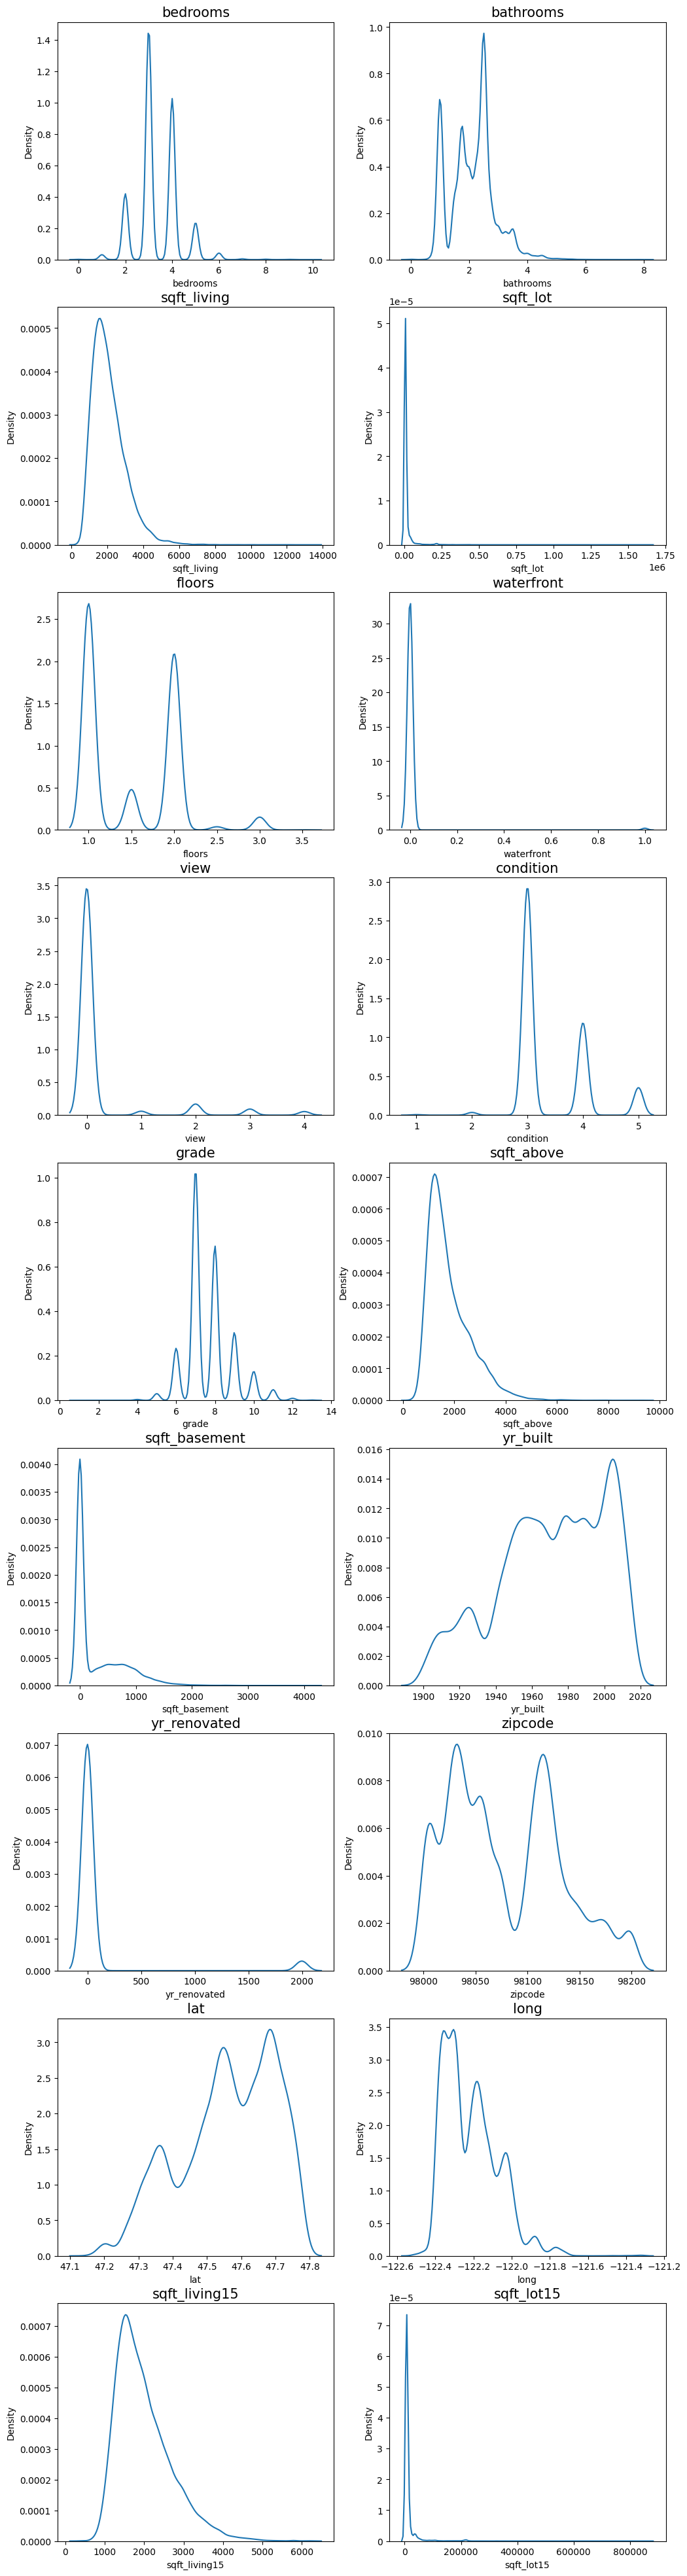

In [46]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))  

# id Î≥ÄÏàò(count==0Ïù∏ Í≤ΩÏö∞)Îäî Ï†úÏô∏ÌïòÍ≥† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï©ÎãàÎã§.
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

price, bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement Î≥ÄÏàòÍ∞Ä ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Í≤ΩÌñ•ÏùÑ Î≥¥ÏòÄÏäµÎãàÎã§.<br>
log-scalingÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπùÍ≤å ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§.

In [47]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

len(skew_columns)

Ïñçüí¢


7

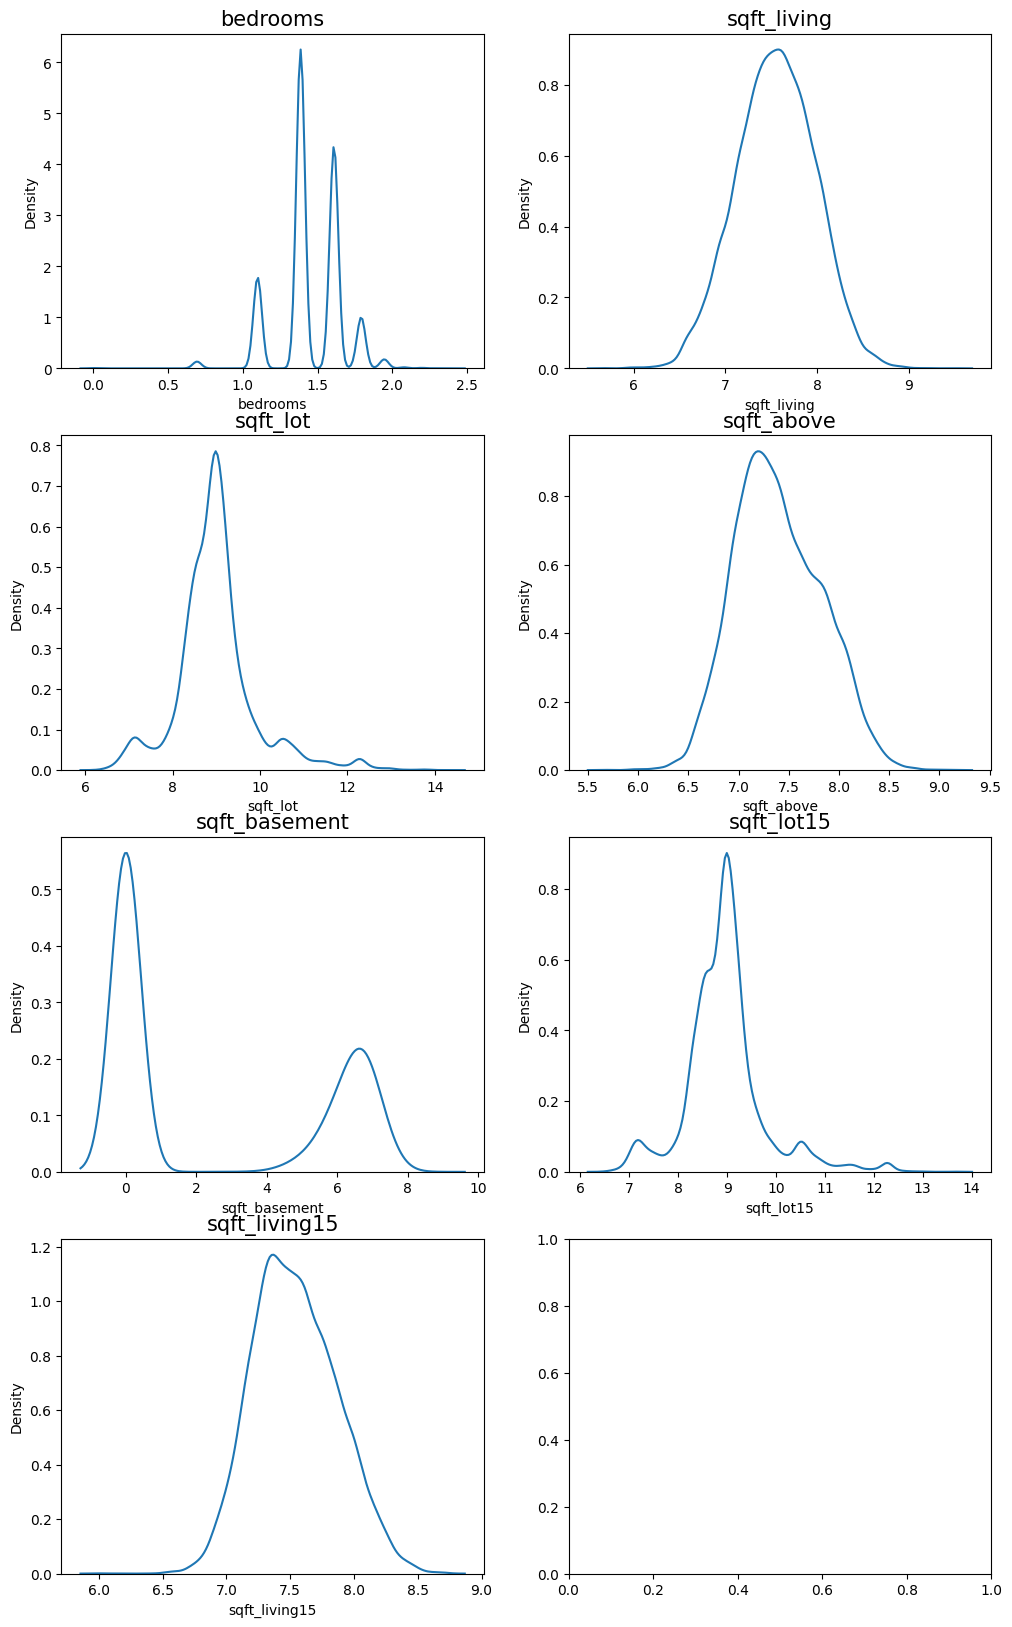

In [48]:
fig, ax = plt.subplots(4, 2, figsize=(12, 20)) 

count = 0
columns = skew_columns
for row in range(4):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 7 :
            break

Ïñ¥ÎäêÏ†ïÎèÑ ÏπòÏö∞Ïπ®Ïù¥ Ï§ÑÏñ¥Îì† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [49]:
#train_len Í∞íÏùÑ Í∏∞Ï§ÄÏúºÎ°ú train data, test dataÎ•º ÎÇòÎààÎã§.
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

print(x.shape)
print(sub.shape)

(15035, 19)
(6555, 19)


## Î™®Îç∏ÌïôÏäµ
### 1. Average Blending
Ïó¨Îü¨Í∞ÄÏßÄ Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º ÏÇ∞Ïà† ÌèâÍ∑†ÏùÑ ÌÜµÌï¥ Blending Î™®Îç∏ÏùÑ ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [80]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)
rdforest = RandomForestRegressor(random_state=2019)


models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}, {'model':rdforest, 'name':'RandomForest'}]

### 2. Cross Validation
ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Í∞ÑÎã®Ìûà ÌèâÍ∞ÄÌïòÍ≤†ÏäµÎãàÎã§.

In [81]:
def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")

In [82]:
get_cv_score(models)

Model: GradientBoosting, CV score:0.8598
Model: XGBoost, CV score:0.8860
Model: LightGBM, CV score:0.8819
Model: RandomForest, CV score:0.8696


## Submission

ÌöåÍ∑Ä Î™®Îç∏Ïùò Í≤ΩÏö∞ÏóêÎäî cross_val_score Ìï®ÏàòÍ∞Ä R<sup>2</sup>Î•º Î∞òÌôòÌï©ÎãàÎã§.<br>
R<sup>2</sup> Í∞íÏù¥ 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Ïûò ÌëúÌòÑÌï®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. 3Í∞ú Ìä∏Î¶¨ Î™®Îç∏Ïù¥ ÏÉÅÎãπÌûà ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Í¥úÏ∞ÆÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïó¨Ï£ºÍ≥† ÏûàÏäµÎãàÎã§.<br> ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú 3Í∞ú Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í≥†, Average BlendingÏùÑ ÌÜµÌï¥ Ï†úÏ∂ú Í≤∞Í≥ºÎ•º ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [83]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

In [84]:
y_pred = AveragingBlending(models, x, y, sub)
print(len(y_pred))
y_pred

6555


array([1349470.30932082,  312603.54416721,  774719.43905978, ...,
       1668005.19185047,  417248.83893086,  339337.22264456])

In [85]:
result = pd.DataFrame({
    'id' : sub_id, 
    'price' : y_pred
})

result.head()

id         price
0  15208  1.349470e+06
1  15209  3.126035e+05
2  15210  7.747194e+05
3  15211  2.077335e+05
4  15212  4.285177e+05

In [56]:
my_submission_path = join(data_dir, 'submission.csv')

result.to_csv(my_submission_path,index = False)

print(my_submission_path)

../content/sample_data/submission.csv



#Study2
-----------------------------------------------------------------
## Ïó¨Îü¨ Î™®Îç∏Ïóê Îî∞Î•∏ EvaluationÏùÑ Íµ¨ÌïòÍ∏∞ ÏúÑÌïú Ìï®Ïàò Íµ¨ÌòÑ Î∞è Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÌÜµÌïú ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî
###1. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [107]:
#Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

#date ÏûêÎ£åÌòï Î≥ÄÌôò
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

#price yÏóê Ï†ÄÏû•ÌõÑ ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï†úÍ±∞
y = train['price']
del train['price']

#id Í∞í Ï†úÍ±∞
del train['id']
sub_i = test['id']
del test['id']

skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

#ÌïúÏ™ΩÏóê Ïè†Î†§ÏûàÎäî Í∞íÏùÑ Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπùÍ∏∞ ÎßåÎì§Í∏∞ ÏúÑÌï¥ logÍ∞í Î≥ÄÌôò
for c in skew_columns:
    train[c] = np.log1p(train[c].values)
for c in skew_columns:
    test[c] = np.log1p(test[c].values)
y = np.log1p(y)

print(train.shape)
print(test.shape)
print(y.shape)

(15035, 19)
(6555, 19)
(15035,)


###2. Î™®Îç∏ÌïôÏäµ

In [108]:
# Ïù¥Î≤à Í≤ΩÏó∞ÎåÄÌöåÏùò evaluationÏù∏ RMSE Íµ¨ÌòÑ

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

# Î™®Îç∏Ïóê Îî∞Î•∏ RMSEÏùÑ Î∞òÌôòÌïòÎäî Ìï®Ïàò Íµ¨ÌòÑ
models = [gboost, xgboost, lightgbm, rdforest]

def get_scores(models, train, y):
    
    df = {}
    X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=123)

    for model in models:
       model_name = model.__class__.__name__
       model.fit(X_train,y_train)
       prediction = model.predict(X_test)
       df[model_name] = rmse(y_test, prediction)
       score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

    return score_df

get_scores(models, train, y)

RMSE
GradientBoostingRegressor  165417.607778
RandomForestRegressor      152393.041134
LGBMRegressor              147844.184555
XGBRegressor               146816.518339

###3.Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÌÜµÌïú ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî

In [109]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

In [110]:
model = lgb.LGBMRegressor(random_state=2019)

In [111]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV Î™®Îç∏Î°ú Ï¥àÍ∏∞Ìôî
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # Î™®Îç∏ fitting
    grid_model.fit(train, y)

    # Í≤∞Í≥ºÍ∞í Ï†ÄÏû•
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE Í∞í Í≥ÑÏÇ∞ ÌõÑ Ï†ïÎ†¨
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

my_GridSearch(model, train, y, param_grid=param_grid, verbose=2, n_jobs=5)




Fitting 5 folds for each of 4 candidates, totalling 20 fits


max_depth  n_estimators     score     RMSLE
3         10           100 -0.027024  0.164391
2         10            50 -0.029174  0.170804
1          1           100 -0.055024  0.234571
0          1            50 -0.073398  0.270920

In [112]:
model = lgb.LGBMRegressor(max_depth=10, n_estimators=100, random_state=2019)
model.fit(train, y)
prediction = model.predict(test)
prediction = np.expm1(prediction)

result = pd.DataFrame({
    'id' : sub_id, 
    'price' : y_pred
})

result.head

<bound method NDFrame.head of          id         price
0     15208  1.349470e+06
1     15209  3.126035e+05
2     15210  7.747194e+05
3     15211  2.077335e+05
4     15212  4.285177e+05
...     ...           ...
6550  21758  4.268897e+05
6551  21759  5.175074e+05
6552  21760  1.668005e+06
6553  21761  4.172488e+05
6554  21762  3.393372e+05

[6555 rows x 2 columns]>

###4.Submission

In [113]:
submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission['price'] = result['price']
submission.head()

id         price
0  15035  1.349470e+06
1  15036  3.126035e+05
2  15037  7.747194e+05
3  15038  2.077335e+05
4  15039  4.285177e+05

In [114]:
submission.to_csv(my_submission_path, index=False)
print(my_submission_path)

../content/sample_data/submission.csv


-----------------------------------------------------------------
#Study3
###Îã§ÏñëÌïú Î™®Îç∏Ïùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÌÜµÌï¥ ÏµúÏ†ÅÌôîÌïòÍ≥†, Î∏îÎ†åÎî© Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ RMSE ÏµúÏ†ÅÌôî